                                                       SistersLab Bitirme Projesi - Başak Dilara Çevik

In [88]:

import patoolib
patoolib.extract_archive("movies_dataset.zip", outdir=".")

patool: Extracting movies_dataset.zip ...
patool: running D:\7-Zip\7z.EXE x -o. -- movies_dataset.zip
patool: ... movies_dataset.zip extracted to `.'.


'.'

In [3]:
import pandas as pd   

import os


folder = r'movies_dataset/'
count = 1
# count increase by 1 in each iteration
# iterate all files from a directory
for file_name in os.listdir(folder):
    try:
    # Construct old file name
        source = folder + file_name

    # Adding the count to the new file name and extension
        destination = folder + "movies_" + str(count) + ".csv"

    # Renaming the file
        os.rename(source, destination)
        count += 1
    except:
        pass
print('Tüm dosyaların isimleri değiştirildi.')

print('Yeni isimler: ')
# verify the result
res = os.listdir(folder)
print(res)
#Veri setlerini okuma
for i in range(1, 9):
    globals()['df{}'.format(i)] = pd.read_csv('movies_dataset/movies_{}.csv'.format(i), on_bad_lines='skip')






Tüm dosyaların isimleri değiştirildi.
Yeni isimler: 
['movies_1.csv', 'movies_2.csv', 'movies_3.csv', 'movies_4.csv', 'movies_5.csv', 'movies_6.csv', 'movies_7.csv', 'movies_8.csv']


In [4]:
#Veri setlerini birleştirme
film_butunu = pd.merge(df2, df3, how='left').merge(df4, how='left').merge(df5, how='left').merge(df6, how='left').merge(df7, how='left').merge(df8, how='left')

oyuncular_butunu = pd.merge(df1, df6, how='left')

oyuncular = oyuncular_butunu.groupby("movieid").agg({'actorid': 'first', "name": "first", "sex": "first"})

oyuncular = oyuncular.rename(columns={ 'actorid': 'oyuncu_kodu', "name": "isim", "sex" : "cinsiyet"})

#Film id'sine göre verileri gruplama
film = film_butunu.groupby('movieid').agg({'title': 'first', 'country': 'first', 'genre': 'first', 'actorid': list, 'language': list,
 'rank': 'first', 'votes' : 'mean', 'year': 'first', 'leading': 'first', 'name': 'first'})


film = film.rename(columns={ 'title': 'baslik', 'country': 'ulke', 'genre': 'tur', 'actorid': 'oyuncu_id', 'language': 'dil', 'rank': 'puan', 'votes' : 'oy_sayisi', 'year': 'yil', 'leading': 'basrol', 'name': 'sirket_adi'})



oyuncular.head(10)


#dist yok.

,oyuncu_kodu,isim,cinsiyet
movieid,,,
1672052.0,88796,"Ball, Ray (I)",M
1672111.0,25488,"Alexander, Jace",M
1672580.0,25753,"Alexander, Matt (I)",M
1672716.0,132909,"Berke, Ed",M
1672946.0,238614,"Cantu, David (III)",M
1673647.0,149985,"Bjørnsson, Fredbjørn",M
1673658.0,573391,"Gioia, James",M
1673848.0,201155,"Brown, Nick (IV)",M
1674388.0,125981,"Benfield, John",M


In [5]:
film.head()

,baslik,ulke,tur,oyuncu_id,dil,puan,oy_sayisi,yil,basrol,sirket_adi
movieid,,,,,,,,,,
1672052,'Breaker' Morant (1980),Australia,Drama,"[88796.0, 88796.0, 88796.0, 88796.0, 88848.0, ...","[Afrikaans, Afrikaans, Afrikaans, Afrikaans, A...",7.8,8111.0,1980,20.0,7 Network [au]
1672111,'Crocodile' Dundee II (1988),Australia,Action,"[25488.0, 25488.0, 45936.0, 45936.0, 62300.0, ...","[English, English, English, English, English, ...",5.3,32183.0,1988,39.0,Paramount Pictures [us]
1672580,'Til There Was You (1997),USA,Comedy,"[25753.0, 25753.0, 50592.0, 50592.0, 59130.0, ...","[English, English, English, English, English, ...",4.4,1894.0,1997,22.0,Lakeshore Entertainment [us]
1672716,"'night, Mother (1986)",USA,Drama,"[132909.0, 132909.0, 132909.0, 816535.0, 81653...","[English, English, English, English, English, ...",7.0,1255.0,1986,3.0,Aaron Spelling Productions [us]
1672946,...And Justice for All (2014),USA,Action,"[238614.0, 637279.0, 1094968.0, 1968842.0, 238...","[English, English, English, English, English, ...",NaN,NaN,2014,2.0,Grindhouse Films [us]


In [6]:
def eksik_verilerim(df):
    eksik_veriler = df.isnull().sum()
    eksik_veriler_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_veriler_tablo = pd.concat([eksik_veriler, eksik_veriler_yuzde], axis=1)
    eksik_veriler_tablo_sonuc = eksik_veriler_tablo.rename(
    columns = {0 : 'Eksik Verilerin Sayısı', 1 : '% Değeri'})
    return eksik_veriler_tablo_sonuc

eksik_verilerim(film)   

,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.000000
ulke,0,0.000000
tur,15,0.391850
oyuncu_id,0,0.000000
dil,0,0.000000
puan,55,1.436782
oy_sayisi,57,1.489028
yil,0,0.000000
basrol,31,0.809822
sirket_adi,64,1.671891


In [7]:
film = film.dropna()


eksik_verilerim(film)


,Eksik Verilerin Sayısı,% Değeri
baslik,0,0.0
ulke,0,0.0
tur,0,0.0
oyuncu_id,0,0.0
dil,0,0.0
puan,0,0.0
oy_sayisi,0,0.0
yil,0,0.0
basrol,0,0.0
sirket_adi,0,0.0


In [8]:
oyuncular = oyuncular.dropna()
eksik_verilerim(oyuncular)

,Eksik Verilerin Sayısı,% Değeri
oyuncu_kodu,0,0.0
isim,0,0.0
cinsiyet,0,0.0


In [9]:
film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3714 entries, 1672052 to 2593313
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   baslik      3714 non-null   object 
 1   ulke        3714 non-null   object 
 2   tur         3714 non-null   object 
 3   oyuncu_id   3714 non-null   object 
 4   dil         3714 non-null   object 
 5   puan        3714 non-null   float64
 6   oy_sayisi   3714 non-null   float64
 7   yil         3714 non-null   int64  
 8   basrol      3714 non-null   float64
 9   sirket_adi  3714 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 319.2+ KB


In [10]:
oyuncular.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3798 entries, 1672052.0 to 2593313.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   oyuncu_kodu  3798 non-null   int64 
 1   isim         3798 non-null   object
 2   cinsiyet     3798 non-null   object
dtypes: int64(1), object(2)
memory usage: 118.7+ KB


In [11]:
film.shape

(3714, 10)

In [12]:
oyuncular.shape

(3798, 3)

In [13]:
#Sütunların dağılımı
film.describe().T


,count,mean,std,min,25%,50%,75%,max
puan,3714.0,6.399381,1.139368,1.8,5.7,6.5,7.2,9.3
oy_sayisi,3714.0,28084.978191,63955.770100,5.0,1930.0,7169.5,26013.5,998823.0
yil,3714.0,1985.780022,17.264403,1907.0,1982.0,1994.0,1997.0,2011.0
basrol,3714.0,17.520732,16.657211,0.0,5.0,13.0,25.0,154.0


In [14]:
oyuncular.describe().T

,count,mean,std,min,25%,50%,75%,max
oyuncu_kodu,3798.0,127591.18931,207430.01525,4.0,30503.0,70215.5,148618.0,2579564.0


**Ülkelere göre film sayısı**

In [15]:
film.groupby('ulke').size().sort_values(ascending=False)


ulke
USA                               2425
UK                                 360
France                             274
Canada                             120
Germany                            102
Australia                           66
Italy                               56
Japan                               53
Ireland                             30
Belgium                             29
Hong Kong                           22
China                               17
Spain                               15
Argentina                           12
New Zealand                         11
Mexico                              11
Denmark                             11
Austria                             11
India                                7
Brazil                               6
Soviet Union                         5
Norway                               5
Cuba                                 5
Netherlands                          5
Czech Republic                       5
South Africa        

**Ülkelere göre film sayısı ve görselleştirilmesi**

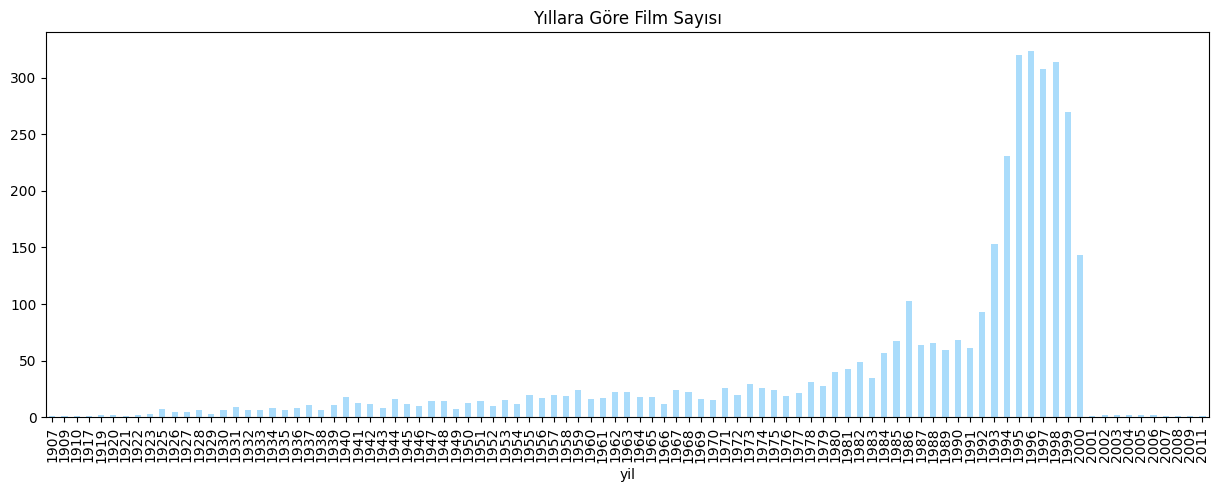

In [16]:
film.groupby('yil').count()['baslik'].plot(kind='bar', figsize=(15,5), color='lightskyblue', fontsize=10, title='Yıllara Göre Film Sayısı', alpha=0.7);


Text(0.5, 1.0, 'Yıllara ve Ülkelere Göre Filmler')

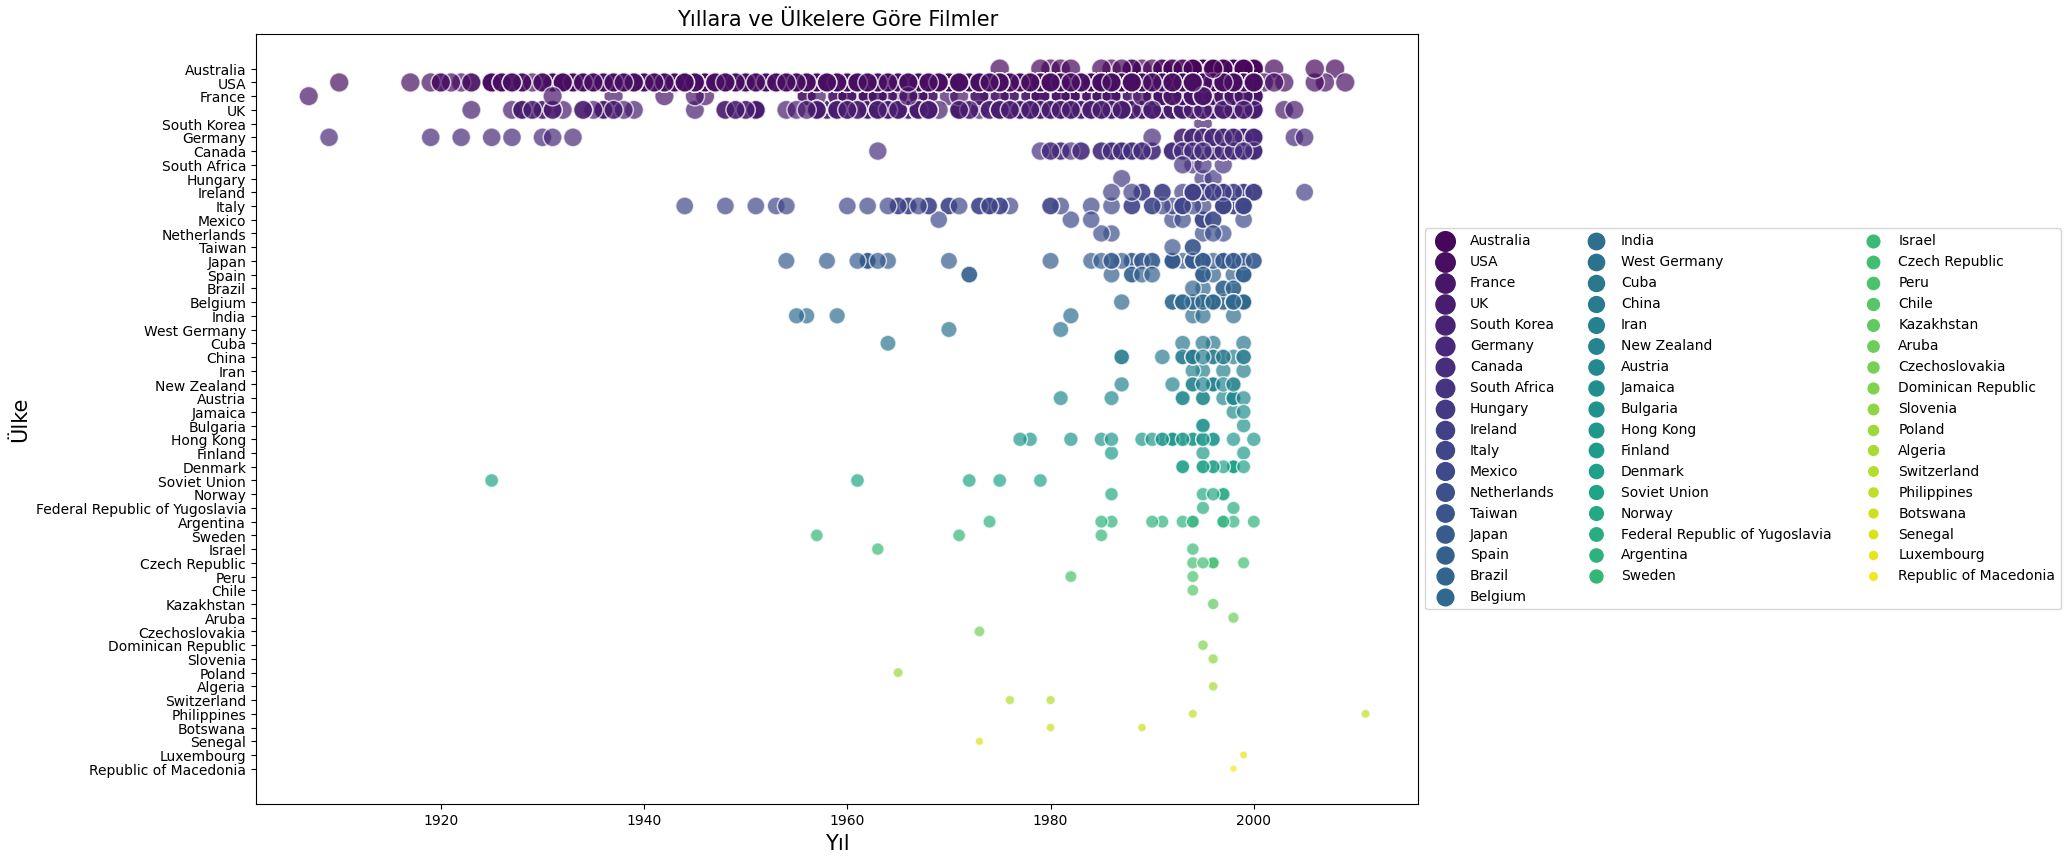

In [51]:
#yıllara ve ülkeye göre scatter plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
g = sns.scatterplot(x='yil', y='ulke', data=film, hue='ulke', size='ulke', sizes=(30, 200), alpha=0.7, palette='viridis')

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
g.set_xlabel('Yıl', fontsize=15)
g.set_ylabel('Ülke', fontsize=15)
plt.title('Yıllara ve Ülkelere Göre Filmler', fontsize=15)

In [ ]:
%matplotlib inline

*  Pie-chart için bir fonksiyon tanımlayalım.

In [ ]:
import matplotlib.pyplot as plt
def ilk_10_ciz(x, y, title):
    
    colors = ['yellowgreen','red','gold','lightskyblue','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, shadow = True, startangle=90, radius=1.2, rotatelabels = True, textprops=dict(color="black"), 
    wedgeprops = { 'linewidth' :0.9, 'edgecolor' : 'white' }, labels=['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)])

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

    plt.axis('equal')
    plt.text(0, 0, title, fontsize=20, color='black', ha='center', va='center')




In [14]:
x = film_ulke.sort_values(ascending=False).head(10).index
y = film_ulke.sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'İlk 10 ülke')
plt.savefig('filmlerin_ulkelere_gore_dagilimi.png', bbox_inches='tight', dpi=600)

NameError: name 'film_ulke' is not defined

**Aktörlerin oynadığı film sayısı**

In [12]:
#aktor = pd.concat([df1, df6])
#aktor.set_index("actorid", inplace=True)


aktor = df1.join(df6.set_index("actorid"), on="actorid")
aktor.set_index(aktor["actorid"], inplace=True)

aktor.index.value_counts().sort_values(ascending=False).head(10)

with open('aktor.txt', 'w', encoding='utf-8') as f:
    f.write(str(aktor.index.value_counts().sort_values(ascending=False)))

aktor.head(10)

aktor_tur = aktor.join(df3.set_index("movieid"), on="movieid")

aktor_tur = aktor_tur.groupby("name")['genre'].value_counts()
aktor_tur.sort_values(ascending=False).head(10)


name                 genre    
Welker, Frank        Family       30
                     Adventure    29
                     Comedy       28
Duvall, Robert       Drama        25
De Niro, Robert      Drama        24
Jackson, Samuel L.   Drama        23
Aykroyd, Dan         Comedy       22
Cusack, Joan         Comedy       21
Keitel, Harvey (I)   Drama        21
Nicholson, Jack (I)  Drama        21
Name: genre, dtype: int64

* En çok filmde oynayan ilk 10 oyuncuyu çizmek için:

In [ ]:
x = aktor.index.value_counts().sort_values(ascending=False).head(10).index
y = aktor.index.value_counts().sort_values(ascending=False).head(10).values
ilk_10_ciz(x, y, 'En çok filmde oynayan 10 aktör')
plt.savefig('en_cok_filmde_oynayan.png', bbox_inches='tight', dpi=600)

**Aktörlerin oynadığı film türleri**

In [ ]:
aktor_tur = aktor.join(df3.set_index("movieid"), on="movieid")

aktor_tur.head(10)



with open('aktor_tur.txt', 'w', encoding='utf-8') as f:
    f.write(str(aktor_tur["genre"]))

**Ülkelere göre hangi tür filmler çekilmiş?** 


In [ ]:

ulke_tur = df2.join(df3.set_index("movieid"), on="movieid")

ulke_tur.head(10)
ulke_tur = ulke_tur.groupby("country")["genre"].value_counts()
ulke_tur





In [ ]:

import matplotlib.pyplot as plt

secilmis_ulke = ulke_tur.index.get_level_values("country") == "USA", "UK", "France", "Germany", "Italy", "Spain", "Japan", "Turkey"
for ulke in ulke_tur.index.levels[0]:
    import warnings
    warnings.filterwarnings("ignore")
    if ulke in secilmis_ulke: 
        fig, ax = plt.subplots(figsize=(15, 3));
        
        ax.set_title(ulke)
       
        ax.set_ylabel("Film Sayısı")
        ulke_tur[ulke].plot(kind="bar", ax=ax, color="green", alpha=0.5, rot=0, width=0.8, edgecolor="black", linewidth=1.2, fontsize=7, grid=True)
        ax.set_xlabel("Tür")

        x = ulke_tur[ulke].index
        y = ulke_tur[ulke].values
        ax.scatter(x, y, s=100, color="red", alpha=0.5, edgecolor="black", linewidth=1.2)

        plt.savefig('{}.png'.format(ulke), bbox_inches='tight', dpi=600)


**Türe göre kadın-erkek aktör sayısı**

In [ ]:
film.columns

In [ ]:
film.head(10)

In [ ]:
def yil_ayir(x):
    if x == "????":
        return np.nan
    else:
        return int(x)


film["year"] = film["year"].apply(yil_ayir)

In [ ]:
print